# **FastAI Image Classifier**

### In this project, we will classify images to determine whether the image is of a cat or not. The output will be true if it is a cat, and false if it is not.

Import all required modules from the fastai library for computer vision

In [ ]:
from fastai.vision.all import *

Download and extract the Oxford-IIIT Pet dataset using fastai's dataset utility

In [ ]:
path = untar_data(URLs.PETS)/'images'

Define a labeling function that extracts the pet breed name from the image file

In [ ]:
def is_cat(x): return x[0].isupper()

Create the DataLoaders object by loading images, applying the label function,
resizing them, and performing standard data augmentation

In [ ]:
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224))

Display a few sample images from the dataset to verify the data and labels


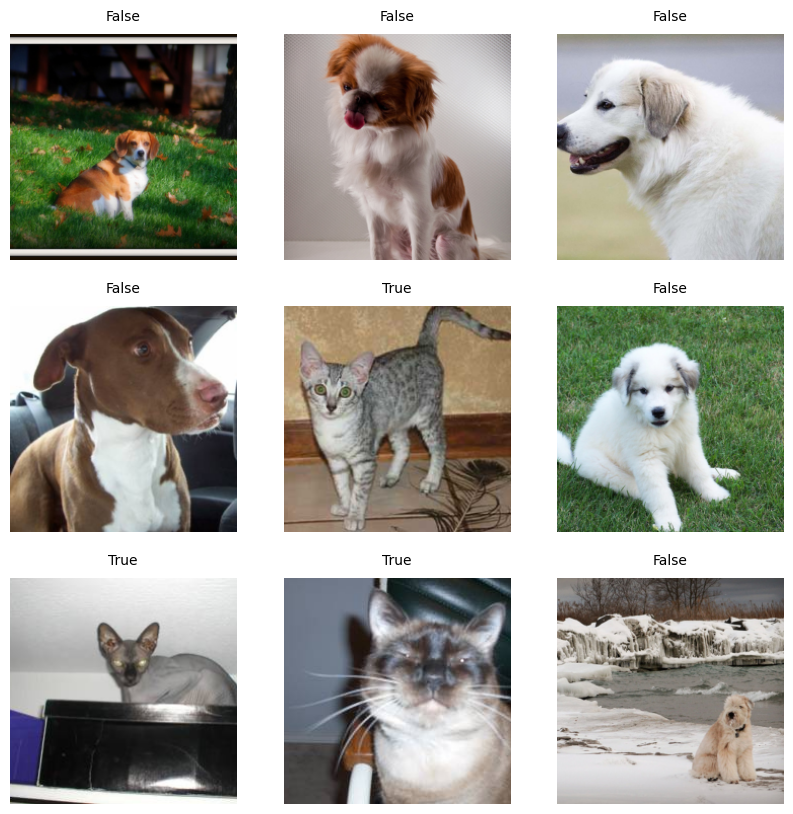

In [ ]:
import matplotlib.pyplot as plt

dls.show_batch(max_n=9, figsize=(10, 10))

for ax in plt.gcf().axes:
    title = ax.get_title()
    ax.set_title(title, fontsize=10, pad=10)

Initialize a convolutional neural network learner using a pretrained ResNet34 model and set accuracy as the evaluation metric

In [ ]:
learn = cnn_learner(dls, resnet34, metrics=accuracy)

/usr/local/lib/python3.11/dist-packages/fastai/vision/learner.py:303: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")


Use the learning rate finder to identify an optimal learning rate before training


SuggestedLRs(valley=0.0005754399462603033)

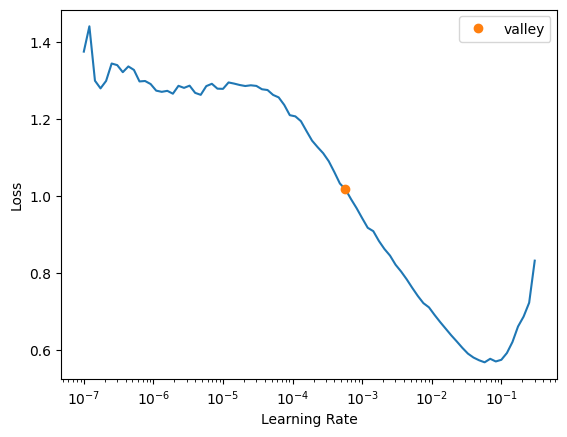

In [ ]:
learn.lr_find()

Fine-tune the model using the selected dataset for 4 epochs


In [ ]:
learn.fine_tune(4)

epoch,train_loss,valid_loss,accuracy,time
0,0.142380,0.022798,0.993911,00:41


epoch,train_loss,valid_loss,accuracy,time
0,0.053246,0.100480,0.978349,00:43
1,0.045974,0.009820,0.994587,00:43
2,0.019337,0.004596,0.997294,00:44
3,0.012257,0.003147,0.998647,00:43


Generate a classification interpretation object to evaluate the model


In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

Plot a confusion matrix to visualize the model’s performance across all classes

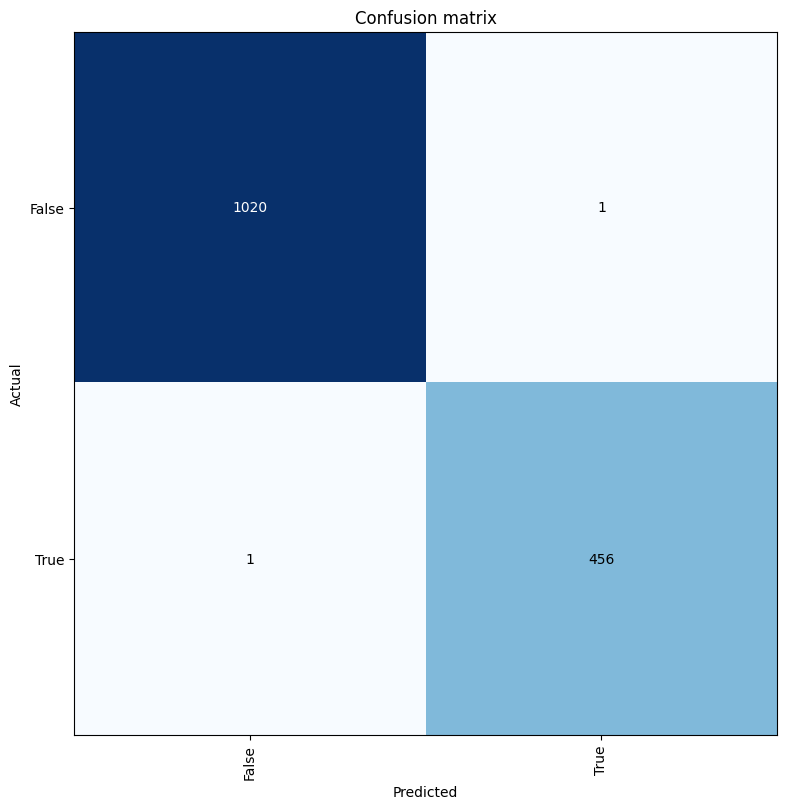

In [ ]:
interp.plot_confusion_matrix(figsize=(8, 8), dpi=100)

 Display the top losses to identify which images the model struggled with the most

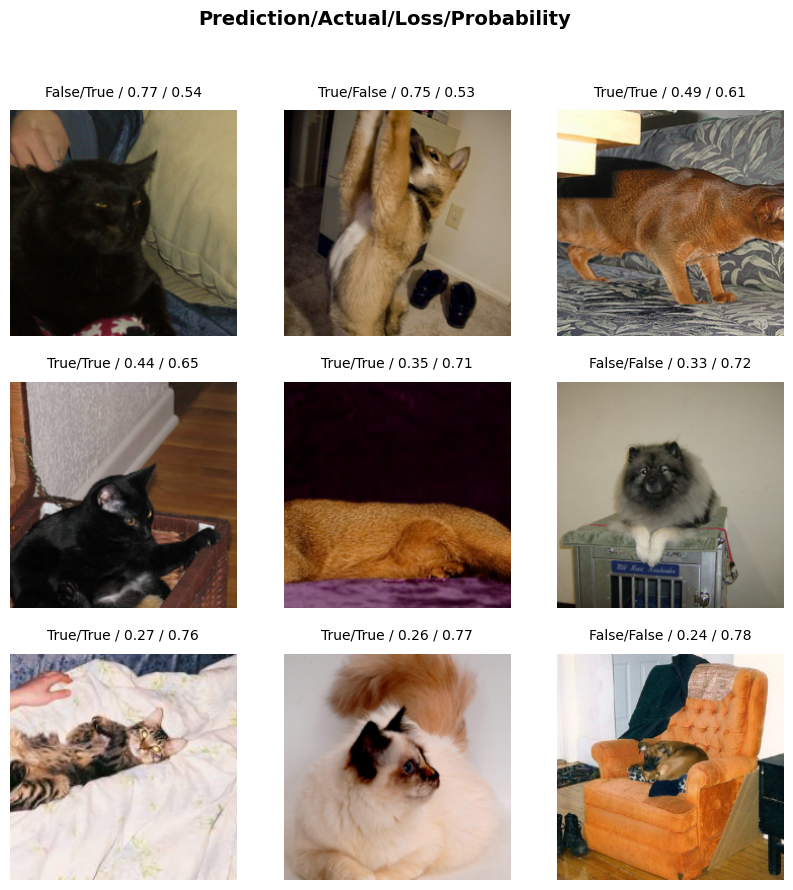

In [ ]:
import matplotlib.pyplot as plt
import textwrap

interp.plot_top_losses(9, nrows=3, figsize=(10, 10))

for ax in plt.gcf().axes:
    title = ax.get_title()
    wrapped_title = "\n".join(textwrap.wrap(title, width=30))
    ax.set_title(wrapped_title, fontsize=10, pad=10)
